# Data Visualization
## Due Tuesday, April 26

In this lab, you will prepare statistical graphics for the MovieLens data set that you examined in the previous lab. Your graphics should be visually attractive and labeled, so please play around with color schemes and styles. You are welcome to use `ggplot`, `seaborn`, or other plotting packages we have not covered in class. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.available

['classic',
 'ggplot',
 'seaborn-muted',
 'dark_background',
 'seaborn-whitegrid',
 'grayscale',
 'seaborn-white',
 'seaborn-bright',
 'seaborn-ticks',
 'seaborn-darkgrid',
 'seaborn-dark-palette',
 'seaborn-colorblind',
 'bmh',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-pastel',
 'fivethirtyeight',
 'seaborn-paper',
 'seaborn-deep',
 'seaborn-dark',
 'seaborn-notebook']

In [2]:
# Read in the Movielens data
import pandas as pd

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('/data/movielens/users.dat', sep='::', header=None,
                      names=unames, engine="python")

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('/data/movielens/ratings.dat', sep='::', header=None,
                        names=rnames, engine="python")

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('/data/movielens/movies.dat', sep='::', header=None,
                       names=mnames, engine="python")

## Question 1 (10 points)

Make a histogram of the distribution of average ratings by user. Make a separate histogram of the distribution of average ratings by movie. (It's up to you whether to put them in the same figure or not.) Comment on what you see. How are the two histograms similar and different?

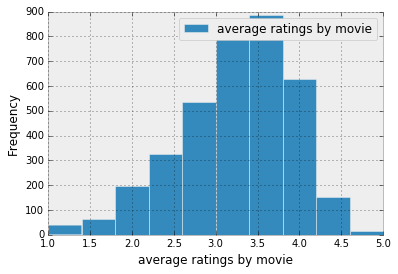

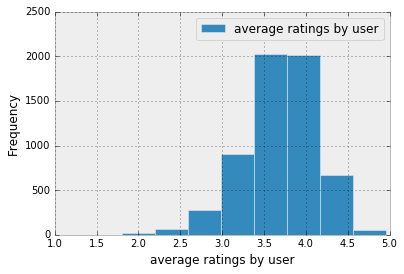

In [3]:
# YOUR CODE HERE
#raise NotImplementedError()

ratings_movie_id = ratings.groupby(["movie_id" ]).mean().get(["rating"])
ratings_user_id = ratings.groupby( ['user_id'] ).mean().get(['rating'])
ratings_user_id

with plt.style.context("bmh"): 
    plt.figure()
    ratings_movie_id.plot.hist()
    plt.xlabel('average ratings by movie')
    plt.legend(['average ratings by movie'])
    
    plt.figure()
    ratings_user_id.plot.hist()
    plt.xlabel('average ratings by user')
    
    plt.legend(['average ratings by user'])

The distribution of average ratings by movie has a larger spread than the distribution of average ratings by user. Average ratings by movie distribution seemed to center around 3.5 while the average ratings by user seemed to center around 3.8. Both distributions are skewed left, meaning ratings assigned/given to a movie indicated majority of movies were better than mediocre (>= 3 ). These histograms show that users on average tended to think that the movies that they just watched were fairly decent.

## Question 2 (20 points)

Make a scatterplot showing the relationship between a user's age and his/her average rating. The size of each point in the scatterplot should correspond to the number of ratings he/she submitted. Comment on what you see, including any outliers and the presence or absence of a relationship.

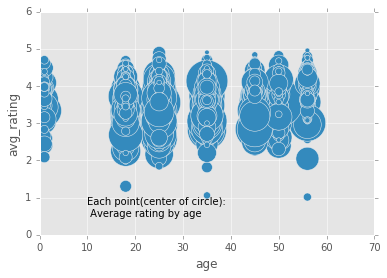

In [4]:
# YOUR CODE HERE
#raise NotImplementedError()



data_merged = pd.merge(ratings, users, on = 'user_id')

ratings_age_avgrate = data_merged.groupby('user_id').mean()
ratings_age_avgrate.columns.values[1] = 'avg_rating'


ratings_age_avgrate['num_ratings'] = data_merged.groupby('user_id')['rating'].count()
ratings_age_avgrate = ratings_age_avgrate.reset_index() 

#ratings_age_avgrate[['num_ratings']].dtypes
ratings_age_avgrate['num_ratings'] = ratings_age_avgrate['num_ratings'].astype(float)

ratings_age_avgrate
with plt.style.context("ggplot"):
    ratings_age_avgrate.plot.scatter(x = 'age' , y = 'avg_rating', s = ratings_age_avgrate['num_ratings']) 
    plt.xlim([0,70]) # set min = 0 to indicate that user_id CANNOT be negative
    # Since size of each point in scatterplot can be large, some of the points will be outside of the min user_id of 0
    #Center of each 'circle' is the actual (x,y) data point, size of circle depends on the number of ratings a user_id gave
    
    #plt.legend(['User\'s average rating'])
    
    plt.text(10, 0.5, "Each point(center of circle):\n Average rating by age")

There doesn't seem to be any correlation between a user's age and his/her average rating. There are three noticeable outliers. At around age 18, there seems to be one user that gave an average rating of around 1, indicating that user's dislike of the movies he/she watched. The other two outliers are respectively age 35 and around age 56. As expected from a rating system on a large variety of movies, majority of users give an average rating at around 3.

## Question 3 (20 points)

Make a bar graph showing the average rating by genre. (You will need to do some data wrangling to get the data into the right form, since right now the "Genre" column lists all the genres a movie was in.) Don't forget error bars showing the 95% confidence intervals. Comment on what you see.

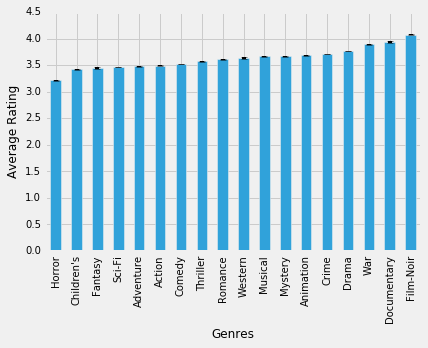

In [5]:
# YOUR CODE HERE
#raise NotImplementedError()

# get stacked series of genre
s = (movies.set_index("movie_id")["genres"].
     str.split("|").apply(pd.Series).stack().
     reset_index(name="genre"))

# merge this to the original ratings
genreData = ratings.merge(s, on="movie_id")

# calculate the mean by genre
avg_rate_genre = genreData.groupby("genre")["rating"].mean().sort_values()
std_rate_genre = genreData.groupby("genre")["rating"].std().sort_values()
count_rate_genre = genreData.groupby("genre")["rating"].count().sort_values()


with plt.style.context("fivethirtyeight"):
    avg_rate_genre.plot.bar(yerr = 1.96 * std_rate_genre / count_rate_genre ** .5)
    #height of bar(x-bar) = average rating by genre
    #+- t.pff(.975) * s/sqrt(n) ; right side is y-error
    
    plt.xlabel('Genres')
    plt.ylabel('Average Rating')


Most of the average ratings of genres do not seem to deviate much from the value of 3.5. In other words, the average ratings are about the same across most genres. The horror genre had a noticeably lower average rating compared to the rest and vice versa for Film_Noir.

## Question 4 (20 points)

Using the `timestamp` column, count up the number of ratings on each day and make a line plot showing this data. You will want to use Pandas' [time series functionality](http://pandas.pydata.org/pandas-docs/stable/timeseries.html) to manipulate this timestamp into more human-friendly datetime format.

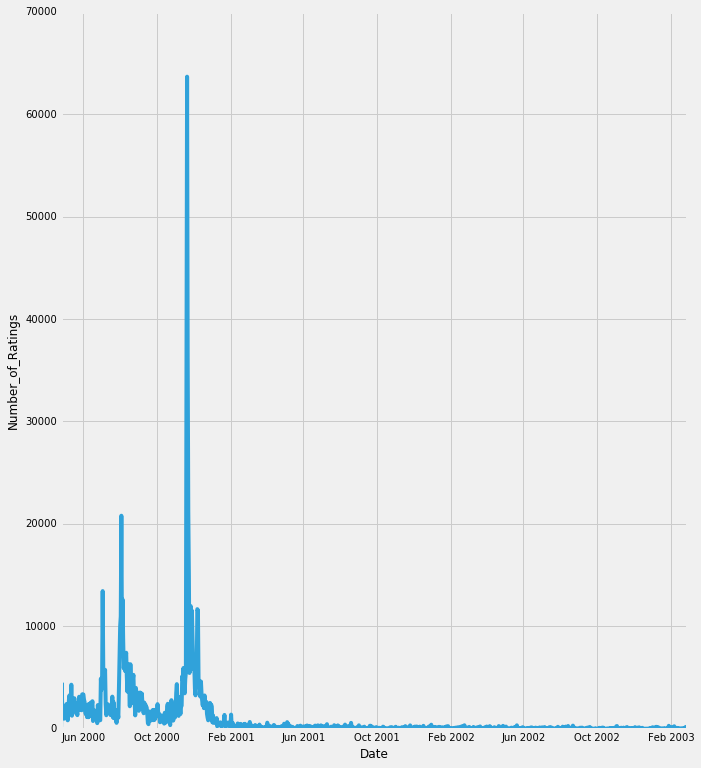

In [9]:
# YOUR CODE HERE


ratings['timestamp_readable'] = pd.to_datetime(ratings['timestamp'],unit = 's')
ratings['timestamp_readable'] = ratings['timestamp_readable'].dt.date
num_rates_per_day = ratings.groupby('timestamp_readable')['user_id'].count()
#num_rates_per_day

with plt.style.context("fivethirtyeight"):
    num_rates_per_day.plot.line(figsize = (10,12))
    plt.xlabel('Date')
    plt.ylabel('Number_of_Ratings')
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
#ratings[['timestamp_readable']] = ratings[['timestamp_readable']].astype(str)

# #ratings['timestamp_readable'] = ratings['timestamp_readable'].str.split()
# #returns column of arrays that separate  date and time

# distinct_dates = {}

# row_index = 0
# last_index = ratings.index[-1] # get last index

# while row_index <= last_index:
    
#     key = ratings['timestamp_readable'][row_index][0]
    
#     if key not in distinct_dates:
#         distinct_dates[key] = 1
#     else:
#         distinct_dates[key] += 1
        
#         row_index += 1

# #Turn dict keys and values into list form so lineplot can be created
# dates_list = list(distinct_dates.keys())
# date_count_list = list( distinct_dates.values() )

#df_for_plot = ratings.from_dict(distinct_dates, orient = 'index' )
#df_for_plot




#distinct_dates
# ratings.index
#ratings['timestamp_readable'][   ratings.index[-1]   ][0] #get last date
#ratings['timestamp_readable'][0][0] <---returns the first date ; [row][index of array(will stay constant)]


Between October 2000 and February 2001, the number of ratings per day skyrocketed. Every month after that, many people stopped giving ratings.

## Question 5 (20 points)

Make an appropriate graphic that explains the relationship between occupation, gender, and average rating. (This question is deliberately open-ended, so there may be several acceptable answers. However, some answers are definitely wrong. Make sure you think carefully about the types of each of these variables.)

In [ ]:
# YOUR CODE HERE

# occupations_list = list(set(users['occupation']))
# occupations_list.sort()

data_merged = pd.merge(users,ratings, on = 'user_id')
data_merged = data_merged.groupby(['gender', 'occupation'])[['rating']].mean()
data_merged.columns = ['avg_rating']


with plt.style.context("ggplot"): 
   
    plt.figure()
    data_merged.plot.bar(figsize = (15,15)) 
   
    plt.xlabel('average ratings by gender and occupation')
    plt.ylabel('average rating')
    


The bar graph shows the average of rating of each combination of occupation and gender. The females who were in occupation 18 gave noticeably higher ratings on average compared to other combinations of occupation and gender.

## Submitting this Lab

Now, restart your kernel and re-run your entire notebook from beginning to end. Make sure there are no errors or bugs. When you have verified this, open the Terminal on JupyterHub and type 

`nbgrader submit Lab-04-19 --course dlsun`

to submit this lab.